In [1]:
import torch
import string
import matplotlib.pyplot as plt

In [2]:
words = open("names.txt", "r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
tokens = ["."] + list(string.ascii_lowercase)
print(tokens)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [4]:
stoi = {ch: i for i, ch in enumerate(tokens)}
itos = {i: ch for ch, i in stoi.items()}

print(stoi)
print(itos)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [5]:
N = torch.zeros(len(tokens), len(tokens), dtype=torch.int32)
N.shape

torch.Size([27, 27])

In [6]:
for word in words:
    word = "." + word + "."
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

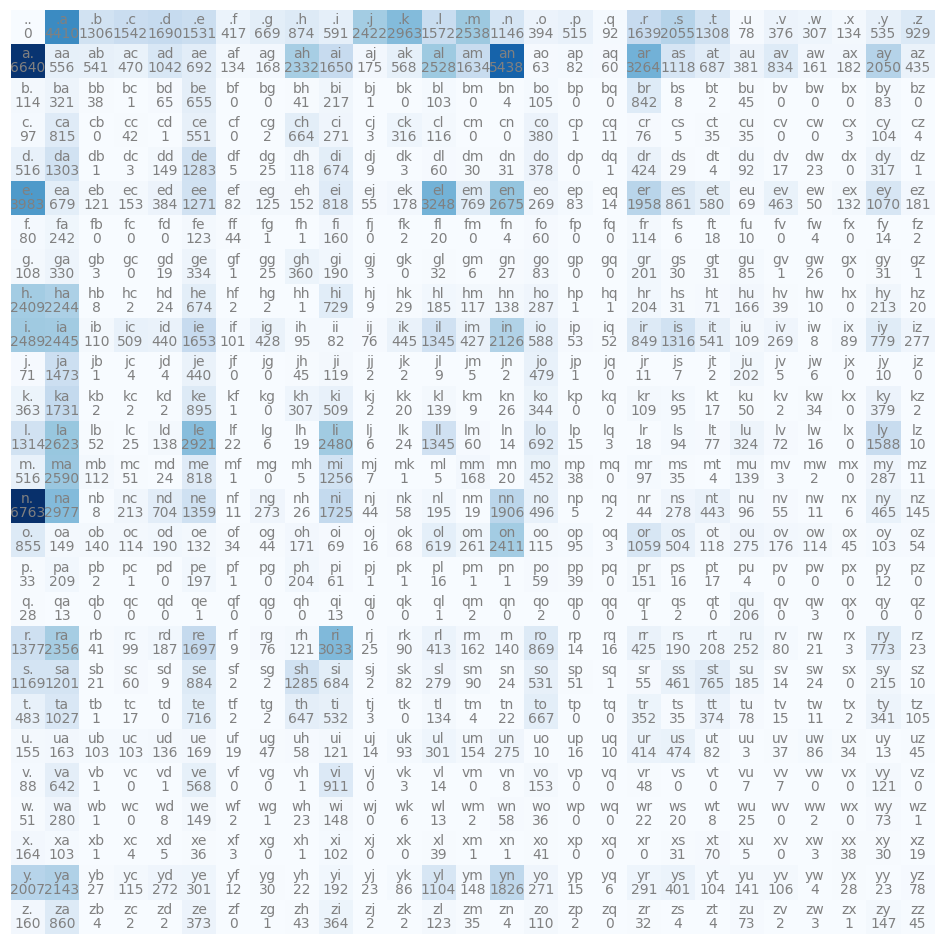

In [7]:
plt.figure(figsize=(12, 12))
plt.imshow(N, cmap="Blues")
for i in range(len(tokens)):
    for j in range(len(tokens)):
        ch1 = itos[i]
        ch2 = itos[j]
        plt.text(j, i, f"{ch1}{ch2}", ha="center", va="bottom", color="gray")
        plt.text(j, i, f"{N[i, j].item()}", ha="center", va="top", color="gray")
plt.axis("off")
plt.show()

In [8]:
P = (N+1).float() # Did model smoothing 
P /= P.sum(1, keepdim=True)


In [9]:
generator = torch.Generator().manual_seed(2147483647)

for i in range(50):
    out = []
    ix = 0
    while True:
        ix = torch.multinomial(P[ix], 1, replacement=True, generator=generator).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print("".join(out))

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush
dgossmitan
il
le
pann
that
janreli
isa
dyn
rijelumemahaunayaleva
cararr
jen
janarta
maly
abely
a
i
lavadoni
themielyawat
f
modam
tavilitikiesaloeverin
n
e
kalbrenelah
anen
ch
k
jan
odridrdenanialilpergha
tezralelia


Evaluating the model

In [11]:
for word in words[:3]:
    word = "." + word + "."
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1] 
        ix2 = stoi[ch2]
        p = P[ix1, ix2]
        print(f"{ch1}{ch2}: {p:.4f}")

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3885
a.: 0.1958
.o: 0.0123
ol: 0.0779
li: 0.1774
iv: 0.0152
vi: 0.3508
ia: 0.1380
a.: 0.1958
.a: 0.1376
av: 0.0246
va: 0.2473
a.: 0.1958


In [23]:
log_likelihood = 0.0
count = 0
for word in words:
    word = "." + word + "."
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1] 
        ix2 = stoi[ch2]
        p = P[ix1, ix2]
        log_likelihood += torch.log(p)
        count += 1

print(f"{log_likelihood=}")
print(f"{log_likelihood/count=}")
print(f"neg log likelihood: {-log_likelihood/count:.4f}")

log_likelihood=tensor(-559951.5625)
log_likelihood/count=tensor(-2.4544)
neg log likelihood: 2.4544
